<div style='text-align:center' >
    <h1>
        Loading Data from Internet
    </h1>
    <h3>
        [Source](https://www.youtube.com/watch?v=IbUa1tTT-7k)
    </h3>
</div>

<h2><div style="float:left; text-align:left; width:*;line-height: 150%">
Previous Part:<br>[Loading Data from Files](Matplotlib Tutorial Part 07 - Loading Data from Files.ipynb)
</div> 
<div style="float:right; text-align:right; width:*;line-height: 150%">
Next Part:<br>[Customization](Matplotlib Tutorial Part 09 - Customization.ipynb)
</div>
<div style='margin: 0 auto; text-align:center; width:190px;line-height: 150%' >
[Table of Contents](Table of Contents.ipynb)
</div></h2>

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import urllib
stock = "EBAY"

## Data Conversion Function

In [2]:
# Not needed in Python2.7
def bytespdate2num(fmt, encoding='utf-8'):
    strconverter = mdates.strpdate2num(fmt)
    def bytesconverter(b):
        s = b.decode(encoding)
        return strconverter(s)
    return bytesconverter

## Getting and Cleaning data

In [3]:
# Yahoo Finance API
stock_price_url = 'http://chartapi.finance.yahoo.com/instrument/1.0/' +stock+ '/chartdata;type=quote;range=10y/csv'

# Getting Data from Yahoo Finance API
source_code = urllib.request.urlopen(stock_price_url).read().decode()

# Cleaning Data
stock_data = []    
split_source = source_code.split('\n')

for line in split_source:
    split_line = line.split(',')
    if len(split_line) == 6:
        if 'values' not in line and 'labels' not in line:
            stock_data.append(line)

# Unpacking Data
date, closep, highp, lowp, openp, volume = np.loadtxt(stock_data,
                                                      delimiter=',',
                                                      unpack=True,
                                                      converters={0: bytespdate2num('%Y%m%d')})

The history saving thread hit an unexpected error (OperationalError('database is locked',)).History will not be written to the database.


## Plotting Points

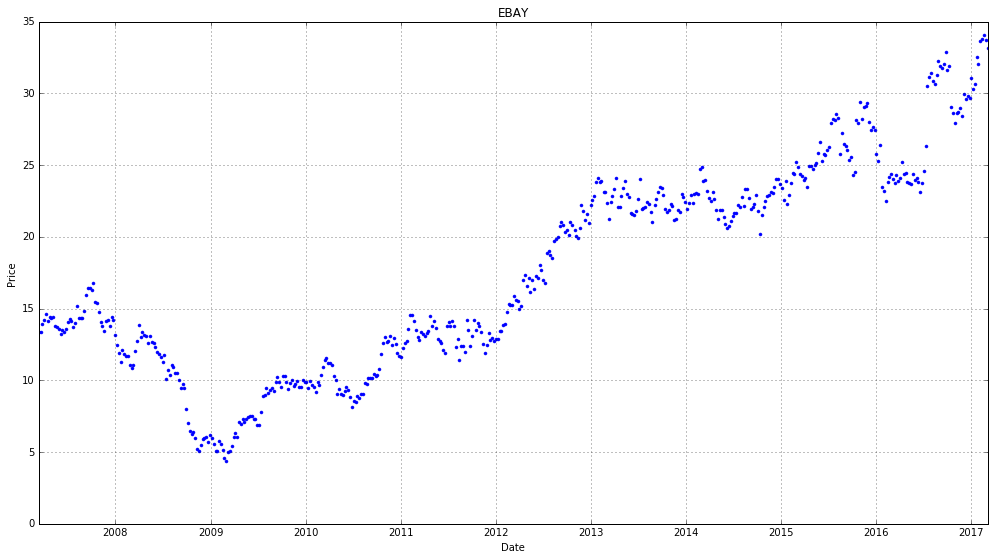

In [4]:
fig = plt.figure(figsize=(17,9))

# Plotting
plt.plot_date(date, closep,".")

plt.xlabel('Date')
plt.ylabel('Price')
plt.title(stock)

plt.grid(True)
plt.show()

## Plotting Lines

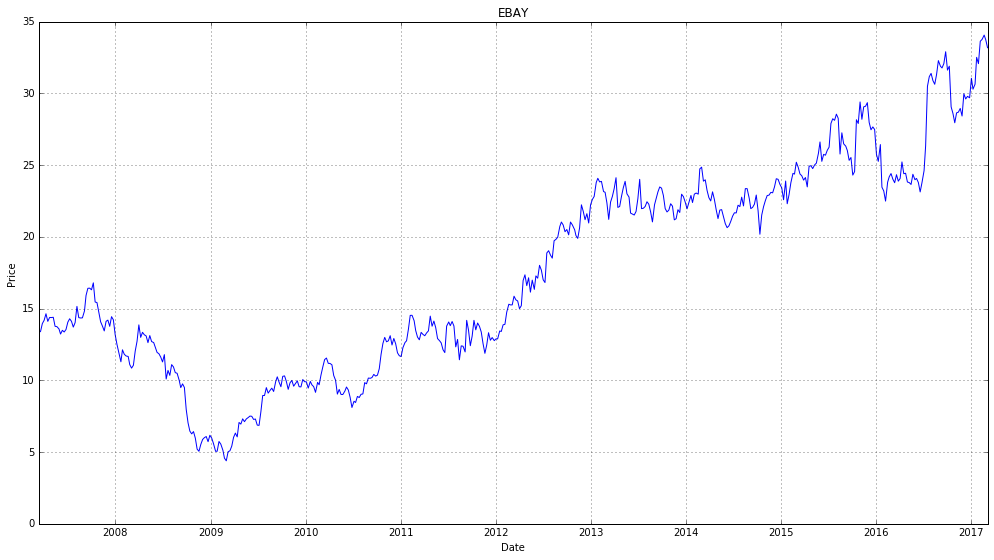

In [5]:
fig = plt.figure(figsize=(17,9))

# Plotting
plt.plot_date(date, closep,"-")

plt.xlabel('Date')
plt.ylabel('Price')
plt.title(stock)

plt.grid(True)
plt.show()

<h2><div style="float:left; text-align:left; width:*;line-height: 150%">
Previous Part:<br>[Loading Data from Files](Matplotlib Tutorial Part 07 - Loading Data from Files.ipynb)
</div> 
<div style="float:right; text-align:right; width:*;line-height: 150%">
Next Part:<br>[Customization](Matplotlib Tutorial Part 09 - Customization.ipynb)
</div>
<div style='margin: 0 auto; text-align:center; width:190px;line-height: 150%' >
[Table of Contents](Table of Contents.ipynb)
</div></h2>